9.891424166688005


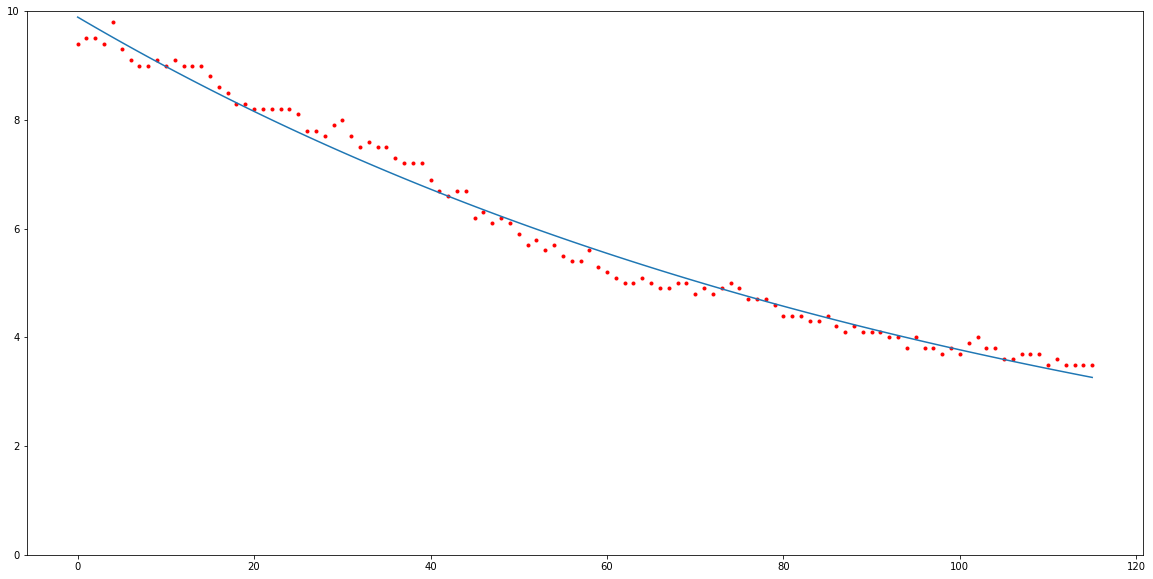

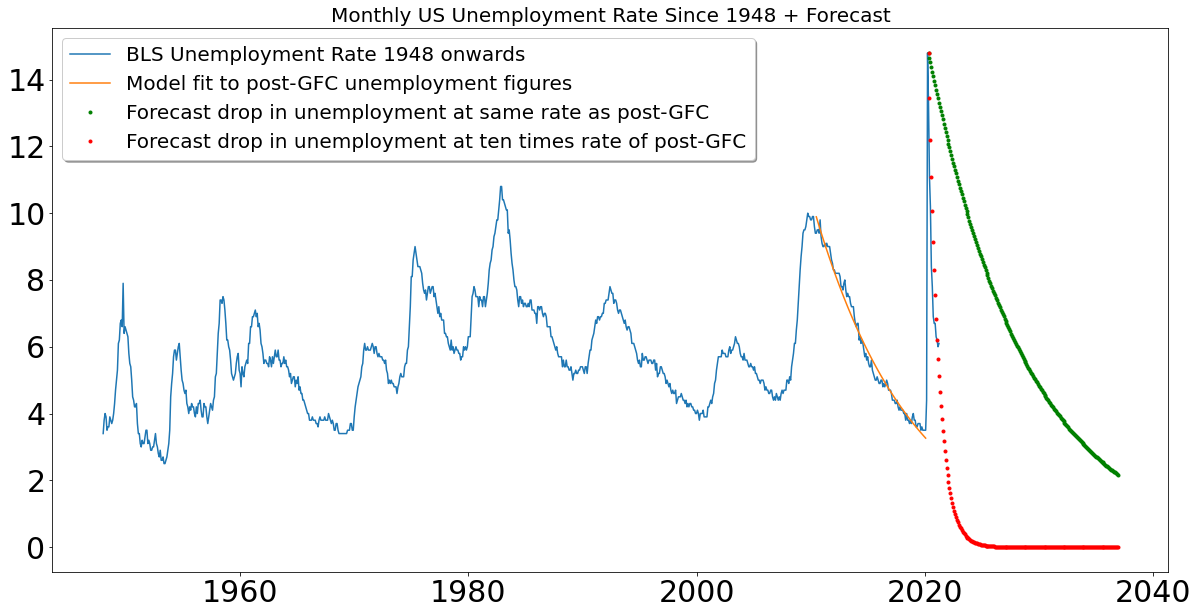

In [15]:
from numpy import log10, asarray, polyfit, ceil, arange, diff
import csv
import matplotlib.pyplot as plt
import scipy as sp
import scipy.optimize
import numpy as np

employment_data_file = '/Users/kootsoop/git/employment/bls_data.csv'

with open(employment_data_file) as csvfile:
    reader = csv.reader(csvfile)
    employment_data = None
    for row in reader:
        non_none_data = [] 
        for val in row: 
            if val != '' : 
                non_none_data.append(val)        
        float_data = [(float(data)) for data in non_none_data[1:len(non_none_data)]]
        if (employment_data is None):
            employment_data = float_data
        else:
            employment_data.extend(float_data)


def model_func(t, A, K, C):
    return A * np.exp(K * t) + C

def fit_exp_nonlinear(t, y):
    opt_parms, parm_cov = sp.optimize.curve_fit(model_func, t, y, maxfev=1000)
    A, K, C = opt_parms
    return A, K, C

def fit_exp_linear(t, y, C=0):
    y = y - C
    y = np.log(y)
    K, A_log = np.polyfit(t, y, 1)
    A = np.exp(A_log)
    return A, K

# Non-linear Fit
last_improvement = employment_data[750:len(employment_data)-14]
months = arange(len(last_improvement))

A, K = fit_exp_linear(months, np.array(last_improvement))
fit_y = model_func(months, A, K, 0)

x_axis = arange(1948, 2021, 1/12)
x_axis = list(x_axis) + list(arange(2021,2021.3,1/12))

plt.figure(figsize=(20,10))
plt.plot(months, last_improvement, 'r.')
plt.plot(months, fit_y)
plt.ylim(0,10)

print(A)


plt.figure(figsize=(20,10))
ax = plt.gca()
# We change the fontsize of minor ticks label 
ax.tick_params(axis='both', which='major', labelsize=30)
plt.plot(x_axis, employment_data, label='BLS Unemployment Rate 1948 onwards')
plt.plot((arange(len(last_improvement))+750)/12+1948, fit_y, label='Model fit to post-GFC unemployment figures')

forecast_time = arange(200)
forecast = model_func(forecast_time, employment_data[867], K, 0)
plt.plot((forecast_time+len(employment_data))/12+1948 - 1, forecast, 'g.', label='Forecast drop in unemployment at same rate as post-GFC')
forecast = model_func(forecast_time, employment_data[867], K*10, 0)
plt.plot((forecast_time+len(employment_data))/12+1948 - 1, forecast, 'r.', label='Forecast drop in unemployment at ten times rate of post-GFC')
plt.title('Monthly US Unemployment Rate Since 1948 + Forecast', fontsize=20)

ax = plt.gca()
ax.legend(loc='upper left', shadow=True, fontsize=20)

plt.savefig('/Users/kootsoop/Pictures/unemployement_forecast.png')


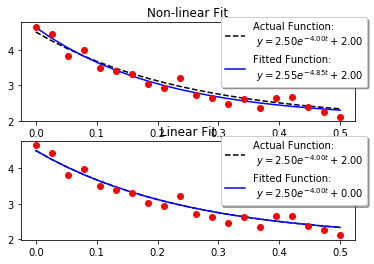

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.optimize


def main():
    # Actual parameters
    A0, K0, C0 = 2.5, -4.0, 2.0

    # Generate some data based on these
    tmin, tmax = 0, 0.5
    num = 20
    t = np.linspace(tmin, tmax, num)
    y = model_func(t, A0, K0, C0)

    # Add noise
    noisy_y = y + 0.5 * (np.random.random(num) - 0.5)

    fig = plt.figure()
    ax1 = fig.add_subplot(2,1,1)
    ax2 = fig.add_subplot(2,1,2)

    # Non-linear Fit
    A, K, C = fit_exp_nonlinear(t, noisy_y)
    fit_y = model_func(t, A, K, C)
    plot(ax1, t, y, noisy_y, fit_y, (A0, K0, C0), (A, K, C0))
    ax1.set_title('Non-linear Fit')

    # Linear Fit (Note that we have to provide the y-offset ("C") value!!
    A, K = fit_exp_linear(t, y, C0)
    fit_y = model_func(t, A, K, C0)
    plot(ax2, t, y, noisy_y, fit_y, (A0, K0, C0), (A, K, 0))
    ax2.set_title('Linear Fit')

    plt.show()

def model_func(t, A, K, C):
    return A * np.exp(K * t) + C

def fit_exp_linear(t, y, C=0):
    y = y - C
    y = np.log(y)
    K, A_log = np.polyfit(t, y, 1)
    A = np.exp(A_log)
    return A, K

def fit_exp_nonlinear(t, y):
    opt_parms, parm_cov = sp.optimize.curve_fit(model_func, t, y, maxfev=1000)
    A, K, C = opt_parms
    return A, K, C

def plot(ax, t, y, noisy_y, fit_y, orig_parms, fit_parms):
    A0, K0, C0 = orig_parms
    A, K, C = fit_parms

    ax.plot(t, y, 'k--', 
      label='Actual Function:\n $y = %0.2f e^{%0.2f t} + %0.2f$' % (A0, K0, C0))
    ax.plot(t, fit_y, 'b-',
      label='Fitted Function:\n $y = %0.2f e^{%0.2f t} + %0.2f$' % (A, K, C))
    ax.plot(t, noisy_y, 'ro')
    ax.legend(bbox_to_anchor=(1.05, 1.1), fancybox=True, shadow=True)

if __name__ == '__main__':
    main()

In [90]:
import random
projects = ['motion-powered-light', 'laundralarm', 'coffeeking', 'lit', 'aqua-drone', 'bear-aware-alarm']
random.shuffle(projects)
random.shuffle(projects)
random.shuffle(projects)
random.shuffle(projects)
random.shuffle(projects)
print(projects)

['aqua-drone', 'bear-aware-alarm', 'lit', 'coffeeking', 'laundralarm', 'motion-powered-light']
